In [1]:
# Install the required libraries
!pip install gspread google-auth
!pip install umap-learn
!pip install pyod

# Import libraries
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.auth import default
from umap import UMAP

# Authenticate and create a client
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=019b53820b4b93bd924f562e76a148deb42101dc49bda0089968b8fc51bd1b9e
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [2]:
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd

# OCRA

In [ ]:
for i in gc.list_spreadsheet_files():
  if 'OCRA Index (fixed) (green baseline measures)' in i['name']:
    spreadsheet = gc.open(i['name']).sheet1
    data = spreadsheet.get_all_values()

In [ ]:
df = pd.DataFrame(data[1:], columns=data[0])
df.drop(['Date'], inplace=True, axis=1)
df

,ID participant,Turn,Plant/Line,Day,Time,Age,Experience,shoulderR_pose1,shoulderR_pose2,shoulderR_pose3,...,FRecu,FFreqR,FFreqL,FForcR,FForcL,FPostR,FPostL,FRisk,IndexRiskR,IndexRiskL
0,VP1I,2,4/4,Thursday,14:22,32,5,,,,...,,,,,,,,,,
1,VP1I,2,4/4,Thursday,14:23,32,5,,,,...,,,,,,,,,,
2,VP1I,2,4/4,Thursday,14:24,32,5,,,,...,,,,,,,,,,
3,VP1I,2,4/4,Thursday,14:25,32,5,,,,...,,,,,,,,,,
4,VP1I,2,4/4,Thursday,14:26,32,5,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,VP43F,3,4/3,Monday,05:14,23,0.166,,,,...,,,,,,,,,,
2301,VP43F,3,4/3,Monday,05:15,23,0.166,,,,...,,,,,,,,,,
2302,VP43F,3,4/3,Monday,05:16,23,0.166,,,,...,,,,,,,,,,
2303,VP43F,3,4/3,Monday,05:17,23,0.166,,,,...,,,,,,,,,,


In [ ]:
for col in df.columns:
  df[col].replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

,ID participant,Turn,Plant/Line,Day,Time,Age,Experience,shoulderR_pose1,shoulderR_pose2,shoulderR_pose3,...,FRecu,FFreqR,FFreqL,FForcR,FForcL,FPostR,FPostL,FRisk,IndexRiskR,IndexRiskL
255,VP5I,2,4/3,Friday,15:02,23,2,2626,19,93,...,4,10,10,0,0,8,8,3,23.125,23.125
256,VP5I,2,4/3,Friday,15:03,23,2,1603,1,132,...,4,10,10,0,0,4,4,3,19.425,19.425
257,VP5I,2,4/3,Friday,15:04,23,2,1457,11,269,...,4,10,10,0,0,2,4,3,17.575,19.425
258,VP5I,2,4/3,Friday,15:05,23,2,1205,32,499,...,4,10,10,0,0,4,4,3,19.425,19.425
259,VP5I,2,4/3,Friday,15:06,23,2,1655,9,75,...,4,10,10,0,0,8,8,3,23.125,23.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,VP39I,3,8,Wednesday,00:47,32,0.25,1715,15,9,...,4,10,10,0,0,4,8,3,19.425,23.125
2078,VP39I,3,8,Wednesday,00:48,32,0.25,1716,11,12,...,4,10,10,0,0,4,8,3,19.425,23.125
2079,VP39I,3,8,Wednesday,00:49,32,0.25,1682,41,16,...,4,10,10,0,0,4,4,3,19.425,19.425
2080,VP39I,3,8,Wednesday,00:50,32,0.25,1641,78,20,...,4,10,10,0,0,4,4,3,19.425,19.425


In [ ]:
def convertID(ID):
  return str(ID[-1:]).lower()

df['ID participant'] = df['ID participant'].apply(convertID)
df

,ID participant,Turn,Plant/Line,Day,Time,Age,Experience,shoulderR_pose1,shoulderR_pose2,shoulderR_pose3,...,FRecu,FFreqR,FFreqL,FForcR,FForcL,FPostR,FPostL,FRisk,IndexRiskR,IndexRiskL
255,i,2,4/3,Friday,15:02,23,2,2626,19,93,...,4,10,10,0,0,8,8,3,23.125,23.125
256,i,2,4/3,Friday,15:03,23,2,1603,1,132,...,4,10,10,0,0,4,4,3,19.425,19.425
257,i,2,4/3,Friday,15:04,23,2,1457,11,269,...,4,10,10,0,0,2,4,3,17.575,19.425
258,i,2,4/3,Friday,15:05,23,2,1205,32,499,...,4,10,10,0,0,4,4,3,19.425,19.425
259,i,2,4/3,Friday,15:06,23,2,1655,9,75,...,4,10,10,0,0,8,8,3,23.125,23.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,i,3,8,Wednesday,00:47,32,0.25,1715,15,9,...,4,10,10,0,0,4,8,3,19.425,23.125
2078,i,3,8,Wednesday,00:48,32,0.25,1716,11,12,...,4,10,10,0,0,4,8,3,19.425,23.125
2079,i,3,8,Wednesday,00:49,32,0.25,1682,41,16,...,4,10,10,0,0,4,4,3,19.425,19.425
2080,i,3,8,Wednesday,00:50,32,0.25,1641,78,20,...,4,10,10,0,0,4,4,3,19.425,19.425


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder_id = LabelEncoder()
df['ID participant'] = encoder_id.fit_transform(df['ID participant'])

encoder_day = LabelEncoder()
df['Day'] = encoder_day.fit_transform(df['Day'])

In [ ]:
# df = df[df['Plant/Line']!= '8']
# df

encoder_plant = LabelEncoder()
df['Plant/Line'] = encoder_plant.fit_transform(df['Plant/Line'])
df

def convertTime(Time):
  return float(Time[:2])+float(Time[3:])/60

df['Time'] = df['Time'].apply(convertTime)
df

encoder_plant = LabelEncoder()
df['Plant/Line'] = encoder_plant.fit_transform(df['Plant/Line'])
df

,ID participant,Turn,Plant/Line,Day,Time,Age,Experience,shoulderR_pose1,shoulderR_pose2,shoulderR_pose3,...,FRecu,FFreqR,FFreqL,FForcR,FForcL,FPostR,FPostL,FRisk,IndexRiskR,IndexRiskL
255,1,2,1,0,15.033333,23,2,2626,19,93,...,4,10,10,0,0,8,8,3,23.125,23.125
256,1,2,1,0,15.050000,23,2,1603,1,132,...,4,10,10,0,0,4,4,3,19.425,19.425
257,1,2,1,0,15.066667,23,2,1457,11,269,...,4,10,10,0,0,2,4,3,17.575,19.425
258,1,2,1,0,15.083333,23,2,1205,32,499,...,4,10,10,0,0,4,4,3,19.425,19.425
259,1,2,1,0,15.100000,23,2,1655,9,75,...,4,10,10,0,0,8,8,3,23.125,23.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,1,3,2,2,0.783333,32,0.25,1715,15,9,...,4,10,10,0,0,4,8,3,19.425,23.125
2078,1,3,2,2,0.800000,32,0.25,1716,11,12,...,4,10,10,0,0,4,8,3,19.425,23.125
2079,1,3,2,2,0.816667,32,0.25,1682,41,16,...,4,10,10,0,0,4,4,3,19.425,19.425
2080,1,3,2,2,0.833333,32,0.25,1641,78,20,...,4,10,10,0,0,4,4,3,19.425,19.425


In [ ]:
df.to_csv('/content/drive/MyDrive/Investigación/OCRA_private/Data/OCRA_quan.csv', index=False)

In [ ]:
ocra_df = pd.read_csv('/content/drive/MyDrive/Investigación/OCRA_private/Data/OCRA_quan.csv')
ocra_df

,ID participant,Turn,Plant/Line,Day,Time,Age,Experience,shoulderR_pose1,shoulderR_pose2,shoulderR_pose3,...,FRecu,FFreqR,FFreqL,FForcR,FForcL,FPostR,FPostL,FRisk,IndexRiskR,IndexRiskL
0,1,2,1,0,15.033333,23,2.00,2626,19,93,...,4,10,10,0,0,8,8,3,23.125,23.125
1,1,2,1,0,15.050000,23,2.00,1603,1,132,...,4,10,10,0,0,4,4,3,19.425,19.425
2,1,2,1,0,15.066667,23,2.00,1457,11,269,...,4,10,10,0,0,2,4,3,17.575,19.425
3,1,2,1,0,15.083333,23,2.00,1205,32,499,...,4,10,10,0,0,4,4,3,19.425,19.425
4,1,2,1,0,15.100000,23,2.00,1655,9,75,...,4,10,10,0,0,8,8,3,23.125,23.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,1,3,2,2,0.783333,32,0.25,1715,15,9,...,4,10,10,0,0,4,8,3,19.425,23.125
855,1,3,2,2,0.800000,32,0.25,1716,11,12,...,4,10,10,0,0,4,8,3,19.425,23.125
856,1,3,2,2,0.816667,32,0.25,1682,41,16,...,4,10,10,0,0,4,4,3,19.425,19.425
857,1,3,2,2,0.833333,32,0.25,1641,78,20,...,4,10,10,0,0,4,4,3,19.425,19.425


In [ ]:
ocra_df.drop(['FRisk','FForcL','FForcR','FFreqR','FFreqL','FRecu','FDura','wristL_pose2','wristL_pose1','wristR_pose2','wristR_pose1'], axis=1, inplace=True)
ocra_df

,ID participant,Turn,Plant/Line,Day,Time,Age,Experience,shoulderR_pose1,shoulderR_pose2,shoulderR_pose3,...,handR_pose1,handR_pose2,handR_pose3,handL_pose1,handL_pose2,handL_pose3,FPostR,FPostL,IndexRiskR,IndexRiskL
0,1,2,1,0,15.033333,23,2.00,2626,19,93,...,81,7,49,199,17,1211,8,8,23.125,23.125
1,1,2,1,0,15.050000,23,2.00,1603,1,132,...,28,1,4,1,2,104,4,4,19.425,19.425
2,1,2,1,0,15.066667,23,2.00,1457,11,269,...,14,0,6,0,4,363,2,4,17.575,19.425
3,1,2,1,0,15.083333,23,2.00,1205,32,499,...,9,0,17,8,1,1019,4,4,19.425,19.425
4,1,2,1,0,15.100000,23,2.00,1655,9,75,...,14,2,30,7,8,1333,8,8,23.125,23.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,1,3,2,2,0.783333,32,0.25,1715,15,9,...,6,7,19,3,1,1223,4,8,19.425,23.125
855,1,3,2,2,0.800000,32,0.25,1716,11,12,...,3,0,24,3,0,1446,4,8,19.425,23.125
856,1,3,2,2,0.816667,32,0.25,1682,41,16,...,4,0,16,4,2,1118,4,4,19.425,19.425
857,1,3,2,2,0.833333,32,0.25,1641,78,20,...,12,0,23,0,0,1158,4,4,19.425,19.425


In [ ]:
poses = ['shoulderR_pose1','shoulderR_pose2','shoulderR_pose3',
         'shoulderL_pose1','shoulderL_pose2','shoulderL_pose3',
         'elbowR_pose1','elbowR_pose2',
         'elbowL_pose1','elbowL_pose2',
         'handR_pose1','handR_pose2','handR_pose3',
         'handL_pose1','handL_pose2','handL_pose3',
         'FPostR','FPostL', 'IndexRiskR', 'IndexRiskL'
         ]
X = ocra_df
X

,ID participant,Turn,Plant/Line,Day,Time,Age,Experience,shoulderR_pose1,shoulderR_pose2,shoulderR_pose3,...,handR_pose1,handR_pose2,handR_pose3,handL_pose1,handL_pose2,handL_pose3,FPostR,FPostL,IndexRiskR,IndexRiskL
0,1,2,1,0,15.033333,23,2.00,2626,19,93,...,81,7,49,199,17,1211,8,8,23.125,23.125
1,1,2,1,0,15.050000,23,2.00,1603,1,132,...,28,1,4,1,2,104,4,4,19.425,19.425
2,1,2,1,0,15.066667,23,2.00,1457,11,269,...,14,0,6,0,4,363,2,4,17.575,19.425
3,1,2,1,0,15.083333,23,2.00,1205,32,499,...,9,0,17,8,1,1019,4,4,19.425,19.425
4,1,2,1,0,15.100000,23,2.00,1655,9,75,...,14,2,30,7,8,1333,8,8,23.125,23.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,1,3,2,2,0.783333,32,0.25,1715,15,9,...,6,7,19,3,1,1223,4,8,19.425,23.125
855,1,3,2,2,0.800000,32,0.25,1716,11,12,...,3,0,24,3,0,1446,4,8,19.425,23.125
856,1,3,2,2,0.816667,32,0.25,1682,41,16,...,4,0,16,4,2,1118,4,4,19.425,19.425
857,1,3,2,2,0.833333,32,0.25,1641,78,20,...,12,0,23,0,0,1158,4,4,19.425,19.425


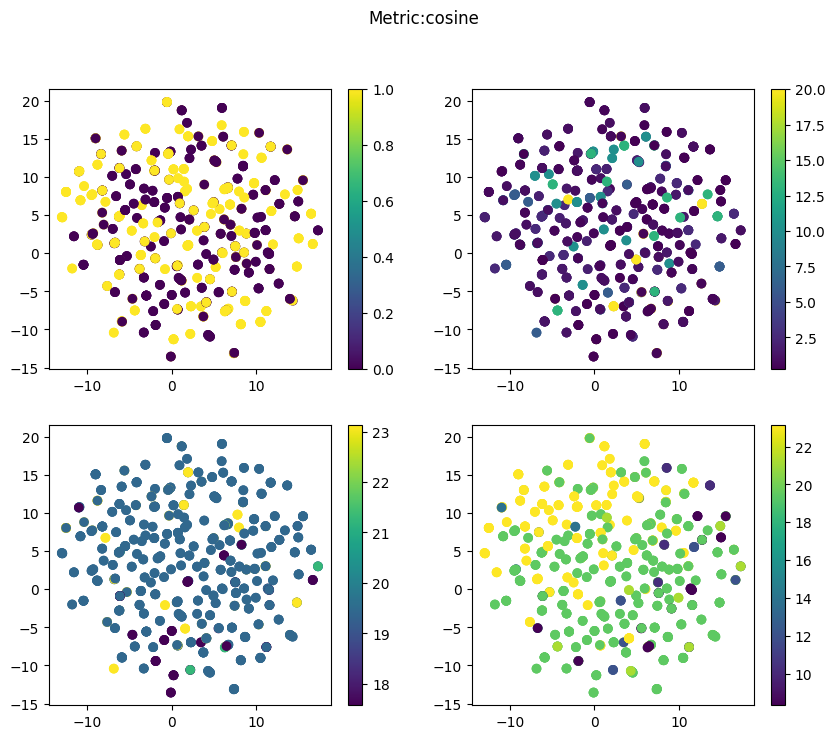

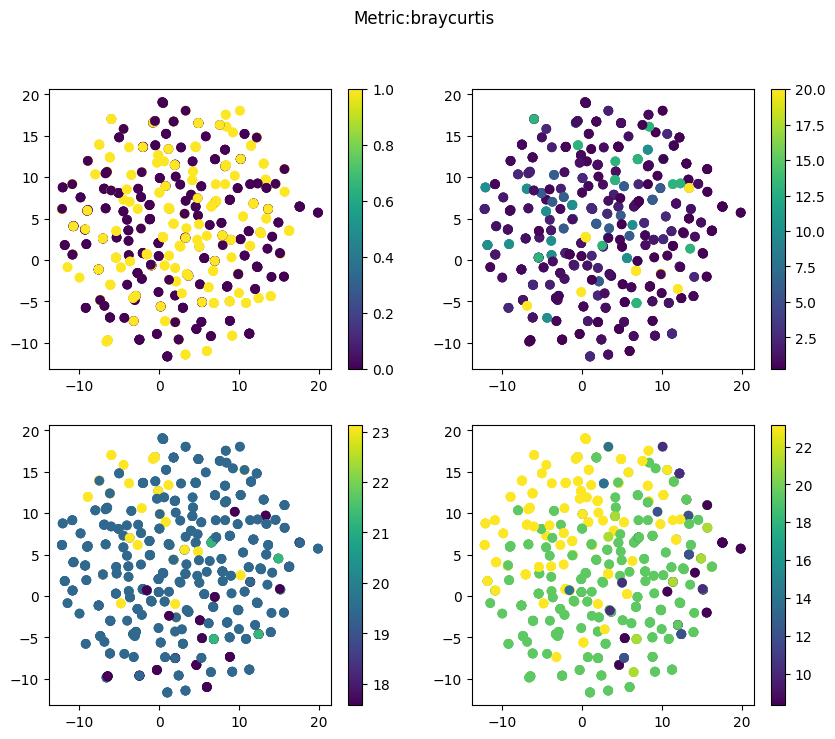

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


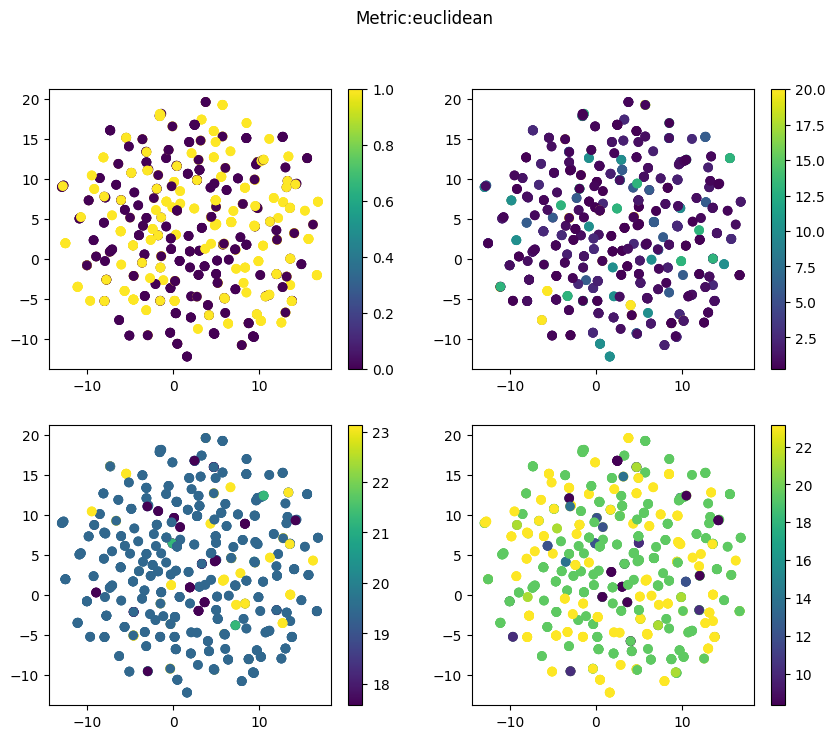

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


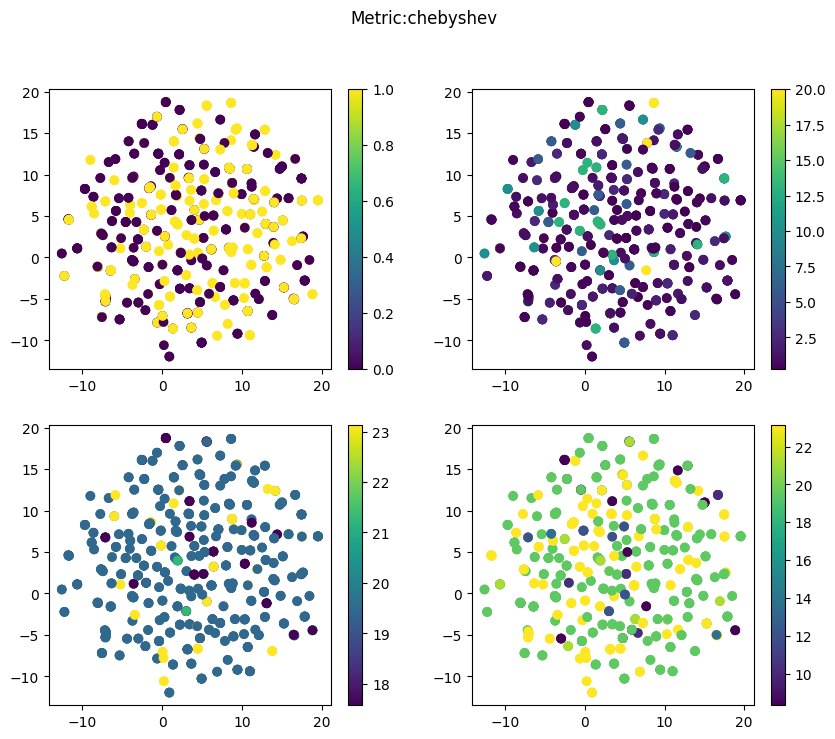

In [ ]:
for me in ['cosine','braycurtis','euclidean','chebyshev']:
  model = UMAP(n_components=2, metric=me, min_dist=0.001, n_neighbors=2)
  embedding = model.fit_transform(X)

  fig = pl.figure(figsize=(10,8))
  pl.subplot(2,2,1)
  pl.scatter(embedding[:,0], embedding[:,1], c=ocra_df['ID participant'])
  pl.colorbar()
  pl.subplot(2,2,2)
  pl.scatter(embedding[:,0], embedding[:,1], c=ocra_df['Experience'])
  pl.colorbar()
  pl.subplot(2,2,3)
  pl.scatter(embedding[:,0], embedding[:,1], c=ocra_df['IndexRiskR'])
  pl.colorbar()
  pl.subplot(2,2,4)
  pl.scatter(embedding[:,0], embedding[:,1], c=ocra_df['IndexRiskL'])
  pl.colorbar()

  pl.suptitle(f'Metric:{me}')
  pl.show()

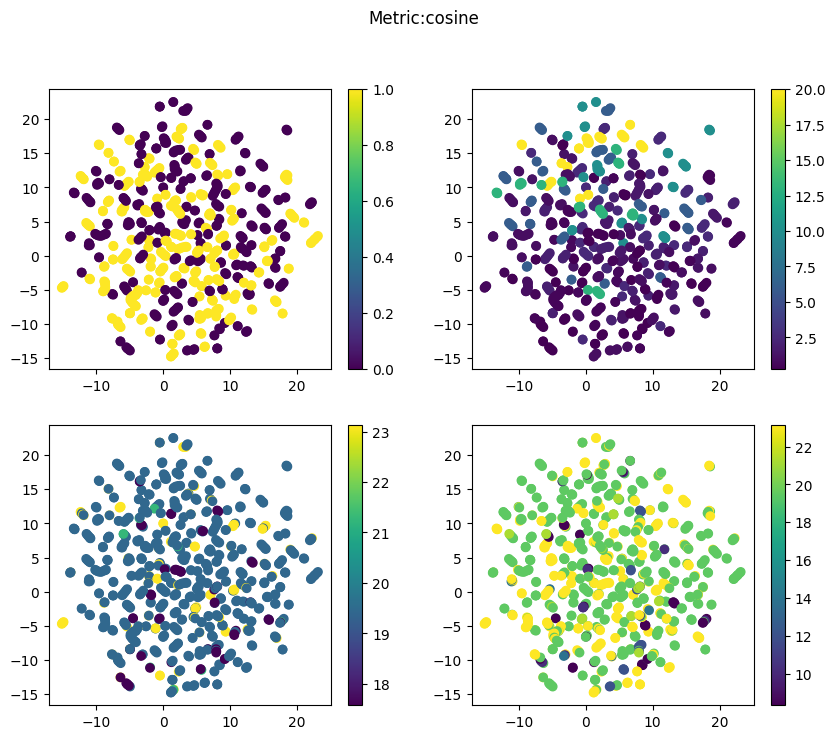

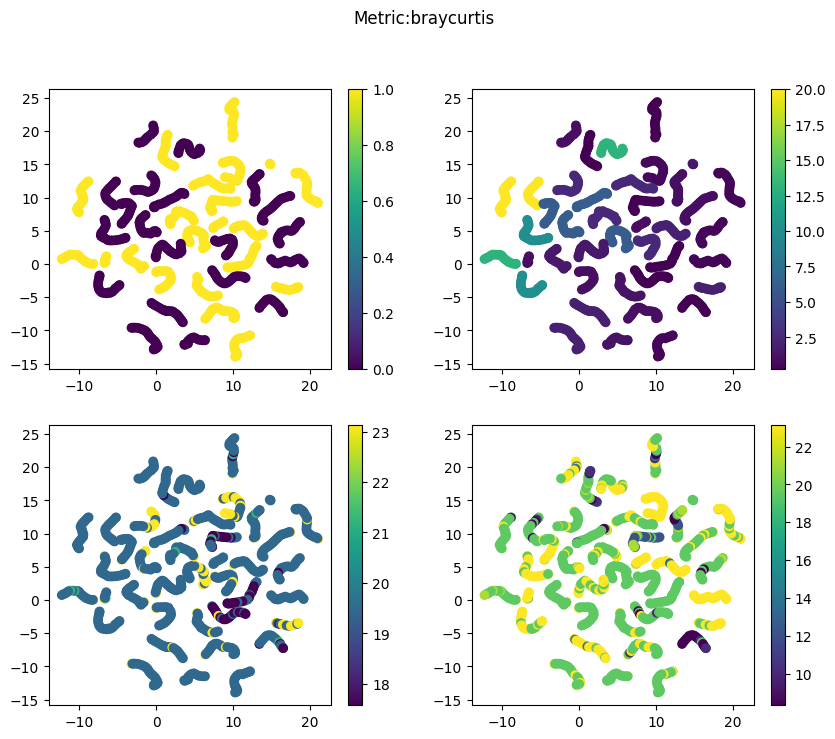

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[3.68671447e-15 2.42026543e-06 2.86337377e-06 1.21975951e-05]
not reaching the requested tolerance 3.859400749206543e-06.
Use iteration 1876 instead with accuracy 
1.921020160022462e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[3.69110592e-15 1.75660956e-06 1.47047571e-06 4.45686796e-06]
not reaching the requested tolerance 3.859400749206543e-06.
  _, diffusion_map = lobpcg(


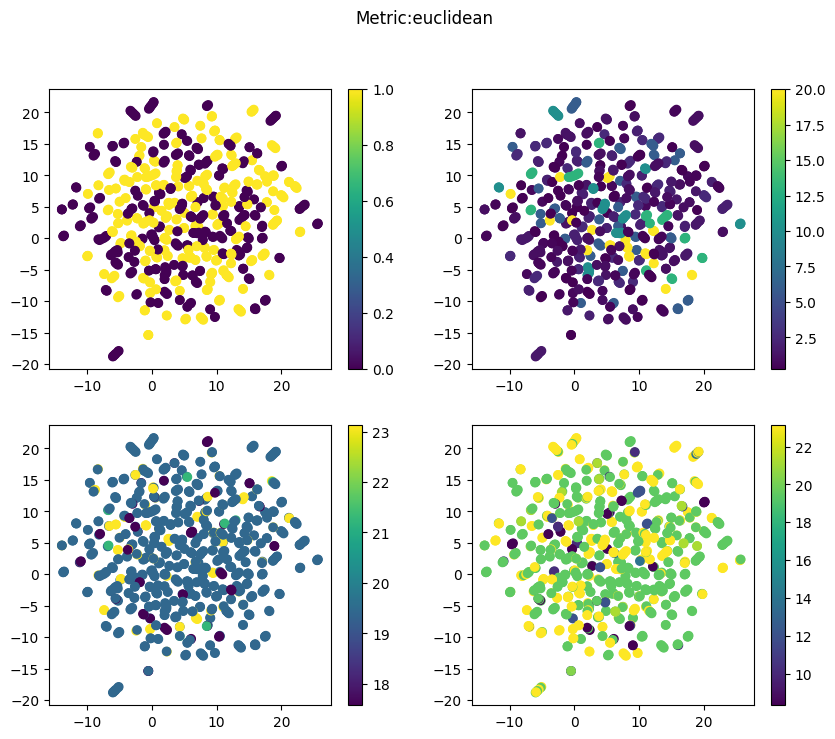

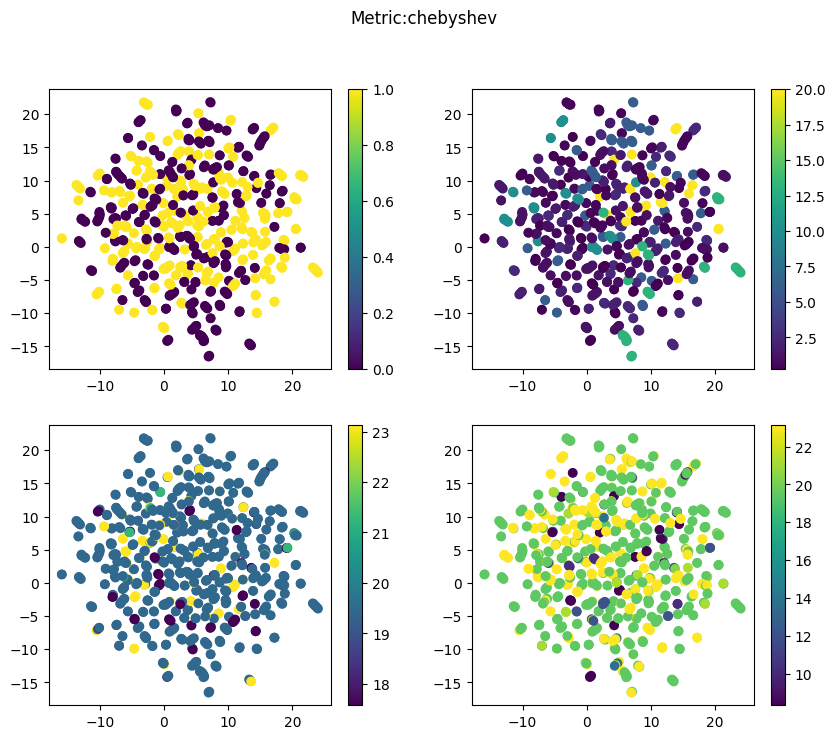

In [ ]:
for me in ['cosine','braycurtis','euclidean','chebyshev']:
  model = UMAP(n_components=2, metric=me, min_dist=0.5, n_neighbors=2)
  embedding = model.fit_transform(X)

  fig = pl.figure(figsize=(10,8))
  pl.subplot(2,2,1)
  pl.scatter(embedding[:,0], embedding[:,1], c=ocra_df['ID participant'])
  pl.colorbar()
  pl.subplot(2,2,2)
  pl.scatter(embedding[:,0], embedding[:,1], c=ocra_df['Experience'])
  pl.colorbar()
  pl.subplot(2,2,3)
  pl.scatter(embedding[:,0], embedding[:,1], c=ocra_df['IndexRiskR'])
  pl.colorbar()
  pl.subplot(2,2,4)
  pl.scatter(embedding[:,0], embedding[:,1], c=ocra_df['IndexRiskL'])
  pl.colorbar()

  pl.suptitle(f'Metric:{me}')
  pl.show()

# Python Outlier Detection (pyod)

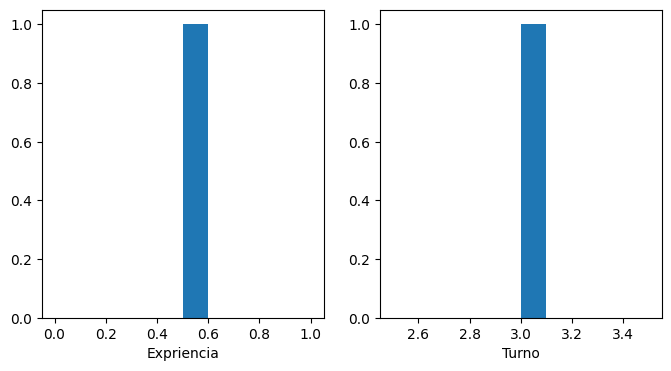

,ID participant,Turn,Plant/Line,Day,Time,Age,Experience,shoulderR_pose1,shoulderR_pose2,shoulderR_pose3,...,handR_pose1,handR_pose2,handR_pose3,handL_pose1,handL_pose2,handL_pose3,FPostR,FPostL,IndexRiskR,IndexRiskL
679,1,3,1,1,0.533333,19,0.5,3027,0,2,...,9,0,106,0,0,4702,8,8,23.125,23.125


In [ ]:
from pyod.models.knn import KNN

clf = KNN(contamination=0.11)
clf.fit(X)
y_pred = clf.predict(X)

probs = clf.predict_proba(X)
is_outlier = probs[:,1]> 0.9

pl.figure(figsize=(8,4))
pl.subplot(1,2,1)
pl.hist(X['Experience'][is_outlier])
pl.xlabel('Expriencia')

pl.subplot(1,2,2)
pl.hist(X['Turn'][is_outlier])
pl.xlabel('Turno')
pl.show()

X[is_outlier]

4


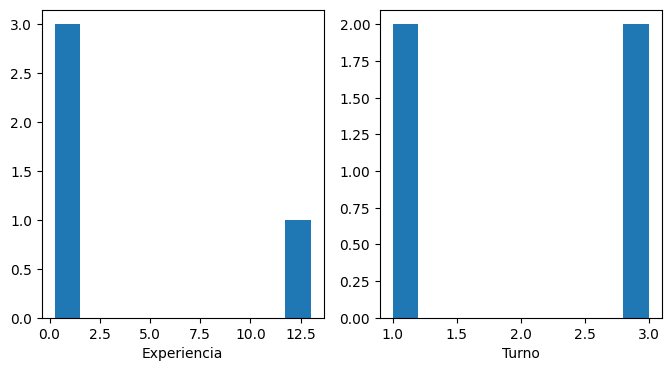

,ID participant,Turn,Plant/Line,Day,Time,Age,Experience,shoulderR_pose1,shoulderR_pose2,shoulderR_pose3,...,handR_pose1,handR_pose2,handR_pose3,handL_pose1,handL_pose2,handL_pose3,FPostR,FPostL,IndexRiskR,IndexRiskL
276,1,1,2,2,8.783333,30,0.25,1242,127,368,...,7,0,3,0,0,37,2,15,17.575,20.350
284,1,1,2,2,8.916667,30,0.25,1094,0,645,...,8,0,1,0,0,37,2,6,17.575,12.025
556,1,3,1,1,22.433333,26,1.00,3382,0,15,...,40,62,14,14,24,2173,8,8,23.125,23.125
712,1,3,2,2,22.783333,47,13.00,2941,40,214,...,4,1,42,0,0,2421,8,8,23.125,23.125


In [ ]:
from pyod.models.ecod import ECOD

clf = ECOD(contamination=0.11)
clf.fit(X)
y_pred = clf.predict(X)

probs = clf.predict_proba(X)
is_outlier = probs[:,1]> 0.9
print(sum(is_outlier))

pl.figure(figsize=(8,4))
pl.subplot(1,2,1)
pl.hist(X['Experience'][is_outlier])
pl.xlabel('Experiencia')

pl.subplot(1,2,2)
pl.hist(X['Turn'][is_outlier])
pl.xlabel('Turno')
pl.show()

X[is_outlier]

# Smart Watch + OCRA

In [3]:
for i in gc.list_spreadsheet_files():
  if 'smartwatch (colour green baseline) + OCRA' in i['name']:
    spreadsheet = gc.open(i['name']).sheet1
    data = spreadsheet.get_all_values()

In [4]:
df = pd.DataFrame(data[1:], columns=data[0])
df

,Moment,Turn,Plant/Line,Day,Age,Experience,eda_scl_usiemens,pulse_rate_bpm,temperature_celsius,accelerometers_std_g,steps_count,activity_counts,IndexRiskR,IndexRiskL,LoTNum
0,,2,4,Thursday,32,5,0.04,83,26.11,0.061,26,134,,,1
1,,2,4,Thursday,32,5,0.42,86,28.16,0.064,13,92,,,1
2,,2,4,Thursday,32,5,0.64,87,28.67,0.053,13,72,,,1
3,,2,4,Thursday,32,5,0.61,82,29.06,0.002,0,2,,,1
4,,2,4,Thursday,32,5,0.37,84,29.42,0.01,0,17,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,,3,3,Monday,23,0.166,0.07,77,30.62,0.106,75,144,,,100
2253,,3,3,Monday,23,0.166,0.07,83,30.63,0.093,92,152,,,100
2254,,3,3,Monday,23,0.166,0.07,73,30.64,0.088,58,147,,,100
2255,,3,3,Monday,23,0.166,0.07,78,30.66,0.11,90,144,,,100


In [5]:
for col in df.columns:
  df[col].replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

<ipython-input-5-216de0bad953>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('', np.nan, inplace=True)


,Moment,Turn,Plant/Line,Day,Age,Experience,eda_scl_usiemens,pulse_rate_bpm,temperature_celsius,accelerometers_std_g,steps_count,activity_counts,IndexRiskR,IndexRiskL,LoTNum
57,I,2,4,Thursday,23,0.58,0.3,77,32.52,0.057,27,129,8.325,10.175,10
58,I,2,4,Thursday,23,0.58,0.29,76,32.52,0.056,21,128,8.325,10.175,10
59,I,2,4,Thursday,23,0.58,0.28,77,32.52,0.071,36,127,8.325,10.175,10
60,I,2,4,Thursday,23,0.58,0.28,80,32.53,0.063,30,132,8.325,10.175,10
61,I,2,4,Thursday,23,0.58,0.3,83,32.54,0.053,27,117,8.325,10.175,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,I,3,8,Wednesday,32,0.25,0.07,97,30.74,0.071,89,147,8.325,8.325,88
2030,I,3,8,Wednesday,32,0.25,0.07,89,30.74,0.073,90,152,8.325,10.175,88
2031,I,3,8,Wednesday,32,0.25,0.12,80,30.75,0.081,94,154,10.175,8.325,88
2032,I,3,8,Wednesday,32,0.25,0.11,78,30.75,0.079,96,147,8.325,8.325,88


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder_moment = LabelEncoder()
df['Moment'] = encoder_moment.fit_transform(df['Moment'])

encoder_day = LabelEncoder()
df['Day'] = encoder_day.fit_transform(df['Day'])

df

,Moment,Turn,Plant/Line,Day,Age,Experience,eda_scl_usiemens,pulse_rate_bpm,temperature_celsius,accelerometers_std_g,steps_count,activity_counts,IndexRiskR,IndexRiskL,LoTNum
57,1,2,4,1,23,0.58,0.3,77,32.52,0.057,27,129,8.325,10.175,10
58,1,2,4,1,23,0.58,0.29,76,32.52,0.056,21,128,8.325,10.175,10
59,1,2,4,1,23,0.58,0.28,77,32.52,0.071,36,127,8.325,10.175,10
60,1,2,4,1,23,0.58,0.28,80,32.53,0.063,30,132,8.325,10.175,10
61,1,2,4,1,23,0.58,0.3,83,32.54,0.053,27,117,8.325,10.175,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,1,3,8,3,32,0.25,0.07,97,30.74,0.071,89,147,8.325,8.325,88
2030,1,3,8,3,32,0.25,0.07,89,30.74,0.073,90,152,8.325,10.175,88
2031,1,3,8,3,32,0.25,0.12,80,30.75,0.081,94,154,10.175,8.325,88
2032,1,3,8,3,32,0.25,0.11,78,30.75,0.079,96,147,8.325,8.325,88


In [7]:
df.to_csv('/content/drive/MyDrive/Investigación/OCRA_private/Data/smart_OCRA_quan.csv', index=False)

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/Investigación/OCRA_private/Data'

In [ ]:
sm_ocra_df = pd.read_csv('/content/drive/MyDrive/Investigación/OCRA_private/Data/smart_OCRA_quan.csv')
sm_ocra_df

,Moment,Turn,Plant/Line,Day,Age,Experience,eda_scl_usiemens,pulse_rate_bpm,temperature_celsius,accelerometers_std_g,steps_count,activity_counts,IndexRiskR,IndexRiskL,LoTNum
0,1,2,4,1,32,5.00,0.25,84,29.78,0.005,0,4,10.175,13.875,1
1,1,2,4,1,32,5.00,0.20,88,30.08,0.098,86,141,8.325,8.325,1
2,1,2,4,1,32,5.00,0.21,85,30.31,0.070,71,144,8.325,8.325,1
3,1,2,4,1,32,5.00,0.16,86,30.56,0.078,88,147,8.325,8.325,1
4,1,2,4,1,32,5.00,0.14,85,30.79,0.069,67,143,8.325,8.325,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1,3,8,3,32,0.25,0.07,97,30.74,0.071,89,147,8.325,8.325,88
974,1,3,8,3,32,0.25,0.07,89,30.74,0.073,90,152,8.325,10.175,88
975,1,3,8,3,32,0.25,0.12,80,30.75,0.081,94,154,10.175,8.325,88
976,1,3,8,3,32,0.25,0.11,78,30.75,0.079,96,147,8.325,8.325,88


In [ ]:
poses = [ 'IndexRiskR', 'IndexRiskL']
X = sm_ocra_df.drop(poses, axis=1)

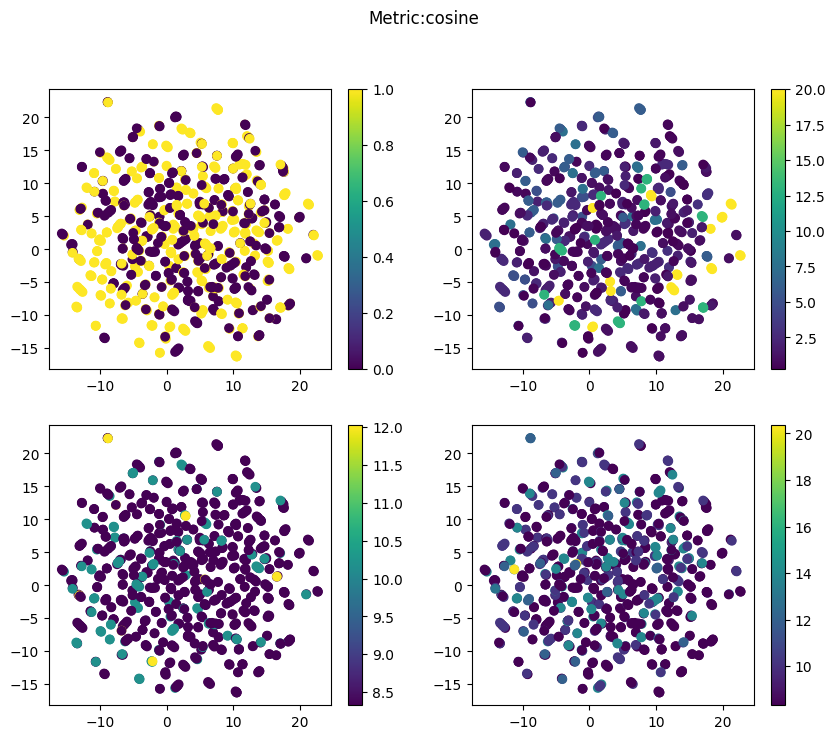

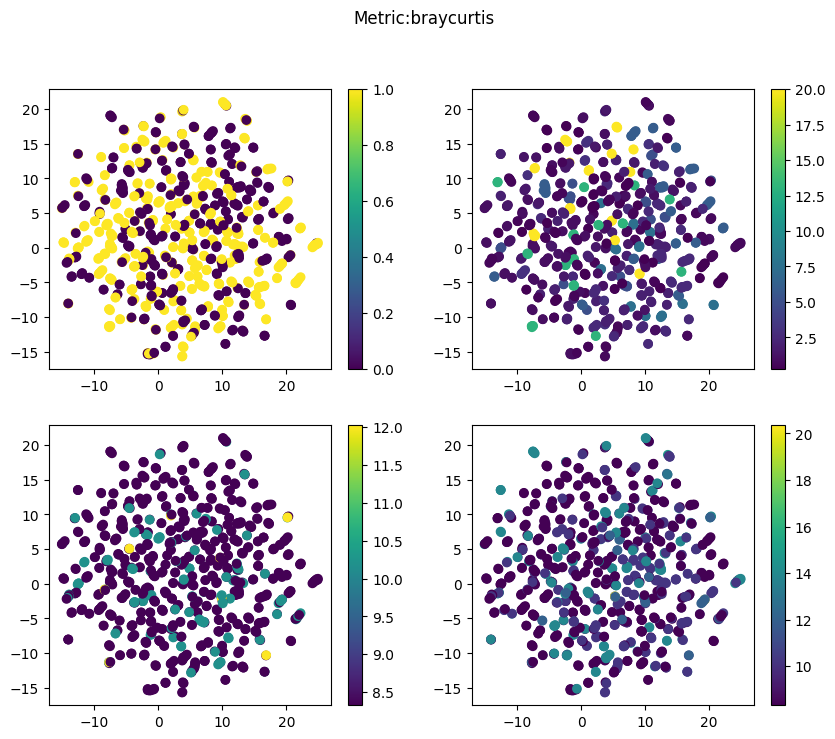

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


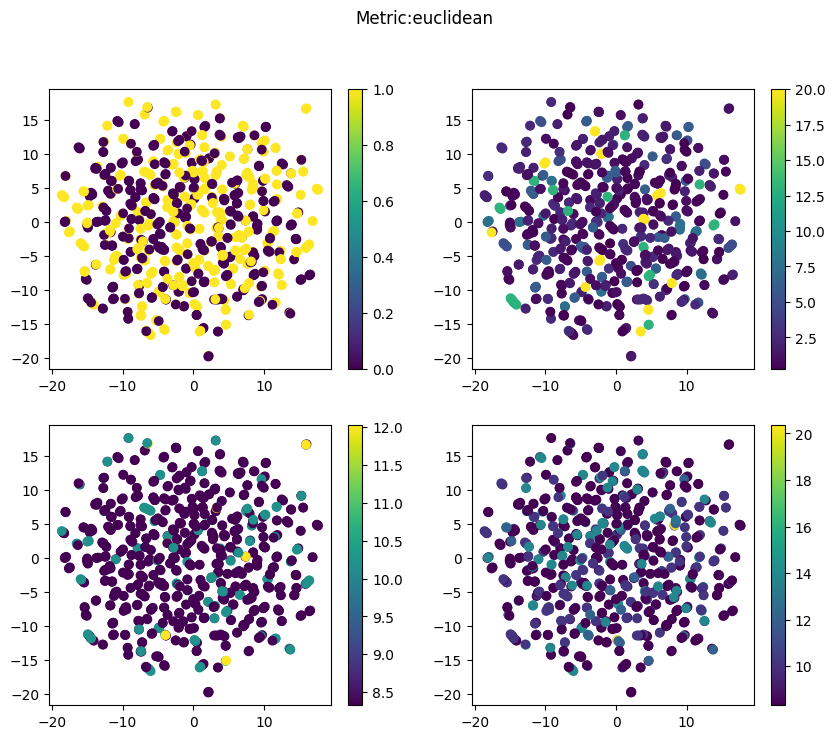

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


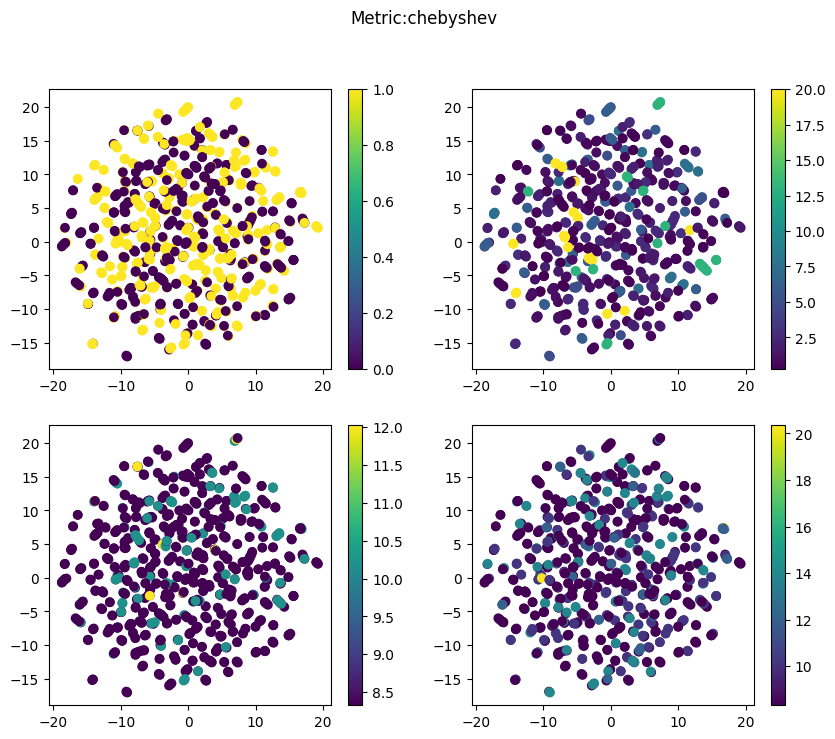

In [ ]:
for me in ['cosine','braycurtis','euclidean','chebyshev']:
  model = UMAP(n_components=2, metric=me, min_dist=0.5, n_neighbors=2)
  embedding = model.fit_transform(X)

  fig = pl.figure(figsize=(10,8))
  pl.subplot(2,2,1)
  pl.scatter(embedding[:,0], embedding[:,1], c=sm_ocra_df['Moment'])
  pl.colorbar()
  pl.subplot(2,2,2)
  pl.scatter(embedding[:,0], embedding[:,1], c=sm_ocra_df['Experience'])
  pl.colorbar()
  pl.subplot(2,2,3)
  pl.scatter(embedding[:,0], embedding[:,1], c=sm_ocra_df['IndexRiskR'])
  pl.colorbar()
  pl.subplot(2,2,4)
  pl.scatter(embedding[:,0], embedding[:,1], c=sm_ocra_df['IndexRiskL'])
  pl.colorbar()

  pl.suptitle(f'Metric:{me}')
  pl.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'SMARTWATCH + OCRA (FIXED).xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming the columns are named 'Turn' and 'EDA'
# Extracting the relevant data for plotting
eda_avg = data.groupby('Turn')['EDA'].mean()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(eda_avg.index, eda_avg.values, marker='o', linestyle='-', color='b')
plt.xlabel('Turn')
plt.ylabel('Average EDA (µS)')
plt.title('Mean EDA Across Shifts')
plt.grid(True)
plt.tight_layout()

# Display the graph
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'SMARTWATCH + OCRA (FIXED).xlsx'